<a target="_blank" href="https://colab.research.google.com/github/sky1ove/katlas/blob/main/nbs/tutorial_03_high_throughput.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Phosphoproteomics scoring

In this session, instead of scoring sequence one by one, we will score the whole phosphoproteomics dataset at once (within minutes!)

Moreover, we will plot the score distribution of a kinase, and check its substrates.

## Setup

In [ ]:
!pip install python-katlas -Uq

In [ ]:
import pandas as pd,numpy as np,seaborn as sns
from matplotlib import pyplot as plt
from katlas.core import *

## Phosphoproteomics dataset

Three datasets are available:

- PhosphoSitePlus human (2024 Jan)
- Ochoa et al. human phosphoproteom
- Combine Ochoa and PSP low throughput data

In [ ]:
psp = Data.get_psp_human_site()
ochoa = Data.get_ochoa_site()
comb = Data.get_combine_site_psp_ochoa()

In [ ]:
psp.head()

,gene,protein,uniprot,site,gene_site,SITE_GRP_ID,species,site_seq,LT_LIT,MS_LIT,MS_CST,CST_CAT#,Ambiguous_Site
0,YWHAB,14-3-3 beta,P31946,T2,YWHAB_T2,15718712,human,______MtMDksELV,NaN,3.0,1.0,None,0
1,YWHAB,14-3-3 beta,P31946,S6,YWHAB_S6,15718709,human,__MtMDksELVQkAk,NaN,8.0,NaN,None,0
2,YWHAB,14-3-3 beta,P31946,Y21,YWHAB_Y21,3426383,human,LAEQAERyDDMAAAM,NaN,NaN,4.0,None,0
3,YWHAB,14-3-3 beta,P31946,T32,YWHAB_T32,23077803,human,AAAMkAVtEQGHELs,NaN,NaN,1.0,None,0
4,YWHAB,14-3-3 beta,P31946,S39,YWHAB_S39,27442700,human,tEQGHELsNEERNLL,NaN,4.0,NaN,None,0


In [ ]:
ochoa.head()

,uniprot,position,residue,is_disopred,disopred_score,log10_hotspot_pval_min,isHotspot,uniprot_position,functional_score,current_uniprot,name,gene,Sequence,is_valid,site_seq,gene_site
0,A0A075B6Q4,24,S,1.0,0.91,6.839384,1.0,A0A075B6Q4_24,0.149257,A0A075B6Q4,A0A075B6Q4_HUMAN,None,MDIQKSENEDDSEWEDVDDEKGDSNDDYDSAGLLSDEDCMSVPGKT...,True,VDDEKGDSNDDYDSA,A0A075B6Q4_S24
1,A0A075B6Q4,35,S,1.0,0.87,9.192622,0.0,A0A075B6Q4_35,0.136966,A0A075B6Q4,A0A075B6Q4_HUMAN,None,MDIQKSENEDDSEWEDVDDEKGDSNDDYDSAGLLSDEDCMSVPGKT...,True,YDSAGLLSDEDCMSV,A0A075B6Q4_S35
2,A0A075B6Q4,57,S,0.0,0.28,0.818834,0.0,A0A075B6Q4_57,0.125364,A0A075B6Q4,A0A075B6Q4_HUMAN,None,MDIQKSENEDDSEWEDVDDEKGDSNDDYDSAGLLSDEDCMSVPGKT...,True,IADHLFWSEETKSRF,A0A075B6Q4_S57
3,A0A075B6Q4,68,S,0.0,0.03,0.375986,0.0,A0A075B6Q4_68,0.119811,A0A075B6Q4,A0A075B6Q4_HUMAN,None,MDIQKSENEDDSEWEDVDDEKGDSNDDYDSAGLLSDEDCMSVPGKT...,True,KSRFTEYSMTSSVMR,A0A075B6Q4_S68
4,A0A075B6Q4,71,S,0.0,0.05,0.000000,0.0,A0A075B6Q4_71,0.095193,A0A075B6Q4,A0A075B6Q4_HUMAN,None,MDIQKSENEDDSEWEDVDDEKGDSNDDYDSAGLLSDEDCMSVPGKT...,True,FTEYSMTSSVMRRNE,A0A075B6Q4_S71


In [ ]:
comb.head()

,uniprot,gene,site,site_seq,source,AM_pathogenicity,CDDM_upper,CDDM_max_score
0,A0A024R4G9,C19orf48,S20,ITGSRLLSMVPGPAR,psp,NaN,"PRKX,AKT1,PKG1,P90RSK,HIPK4,AKT3,HIPK1,PKACB,H...",2.407041
1,A0A075B6Q4,None,S24,VDDEKGDSNDDYDSA,ochoa,NaN,"CK2A2,CK2A1,GRK7,GRK5,CK1G1,CK1A,IKKA,CK1G2,CA...",2.295654
2,A0A075B6Q4,None,S35,YDSAGLLSDEDCMSV,ochoa,NaN,"CK2A2,CK2A1,IKKA,ATM,IKKB,CAMK1D,MARK2,GRK7,IK...",2.488683
3,A0A075B6Q4,None,S57,IADHLFWSEETKSRF,ochoa,NaN,"GRK7,CK2A1,CK2A2,PKN2,GRK1,GRK5,MARK1,MARK2,UL...",1.851894
4,A0A075B6Q4,None,S68,KSRFTEYSMTSSVMR,ochoa,NaN,"AKT1,P90RSK,AKT3,SGK1,AKT2,NDR2,RSK2,P70S6K,RS...",2.026384


## Scoring on all-capital sequence

In [ ]:
comb.head()

,uniprot,gene,site,site_seq,source,AM_pathogenicity,CDDM_upper,CDDM_max_score
0,A0A024R4G9,C19orf48,S20,ITGSRLLSMVPGPAR,psp,NaN,"PRKX,AKT1,PKG1,P90RSK,HIPK4,AKT3,HIPK1,PKACB,H...",2.407041
1,A0A075B6Q4,None,S24,VDDEKGDSNDDYDSA,ochoa,NaN,"CK2A2,CK2A1,GRK7,GRK5,CK1G1,CK1A,IKKA,CK1G2,CA...",2.295654
2,A0A075B6Q4,None,S35,YDSAGLLSDEDCMSV,ochoa,NaN,"CK2A2,CK2A1,IKKA,ATM,IKKB,CAMK1D,MARK2,GRK7,IK...",2.488683
3,A0A075B6Q4,None,S57,IADHLFWSEETKSRF,ochoa,NaN,"GRK7,CK2A1,CK2A2,PKN2,GRK1,GRK5,MARK1,MARK2,UL...",1.851894
4,A0A075B6Q4,None,S68,KSRFTEYSMTSSVMR,ochoa,NaN,"AKT1,P90RSK,AKT3,SGK1,AKT2,NDR2,RSK2,P70S6K,RS...",2.026384


It looks that the sequence are in all-capital format, so we will use `param_CDDM_upper`

In [ ]:
cddm = predict_kinase_df(comb,'site_seq',**param_CDDM_upper)

input dataframe has a length 121419
Preprocessing
Finish preprocessing
Merging reference
Finish merging


In [ ]:
# PSPA involves more calculation, will take longer
pspa = predict_kinase_df(comb,'site_seq',**param_PSPA)

input dataframe has a length 121419
Preprocessing
Finish preprocessing
Merging reference
Finish merging


100%|██████████| 396/396 [01:37<00:00,  4.06it/s]


We can also split S/T and Y sites for scoring.

In [ ]:
comb_y = comb[comb.site_seq.str[7]=='Y']
comb_st = comb[comb.site_seq.str[7]!='Y']

In [ ]:
pspa_y = predict_kinase_df(comb_y,'site_seq',**param_PSPA_y)
pspa_st = predict_kinase_df(comb_st,'site_seq',**param_PSPA_st)

input dataframe has a length 8051
Preprocessing
Finish preprocessing
Merging reference
Finish merging


100%|██████████| 93/93 [00:01<00:00, 72.16it/s]


input dataframe has a length 113368
Preprocessing
Finish preprocessing
Merging reference
Finish merging


100%|██████████| 303/303 [00:38<00:00,  7.79it/s]


## Scoring on phosphorylated sequence

In [ ]:
psp.head()

,gene,protein,uniprot,site,gene_site,SITE_GRP_ID,species,site_seq,LT_LIT,MS_LIT,MS_CST,CST_CAT#,Ambiguous_Site
0,YWHAB,14-3-3 beta,P31946,T2,YWHAB_T2,15718712,human,______MtMDksELV,NaN,3.0,1.0,None,0
1,YWHAB,14-3-3 beta,P31946,S6,YWHAB_S6,15718709,human,__MtMDksELVQkAk,NaN,8.0,NaN,None,0
2,YWHAB,14-3-3 beta,P31946,Y21,YWHAB_Y21,3426383,human,LAEQAERyDDMAAAM,NaN,NaN,4.0,None,0
3,YWHAB,14-3-3 beta,P31946,T32,YWHAB_T32,23077803,human,AAAMkAVtEQGHELs,NaN,NaN,1.0,None,0
4,YWHAB,14-3-3 beta,P31946,S39,YWHAB_S39,27442700,human,tEQGHELsNEERNLL,NaN,4.0,NaN,None,0


It looks that the sequence are in phosphorylated status, so we will use `param_CDDM`

Directly run psp in `predict_kinase_df` will gives an error, as some of the site_sequence do not have S/T/Y at the center. We need to clean them before process.

In [ ]:
psp.site_seq.str[7].value_counts()

site_seq
s    141851
t     58761
y     39367
h        14
k         4
r         3
g         3
p         2
n         1
f         1
l         1
a         1
i         1
d         1
Name: count, dtype: int64

In [ ]:
psp = psp[psp.site_seq.str[7].isin(['s','t','y'])]

In [ ]:
cddm = predict_kinase_df(psp,'site_seq',**param_CDDM)

input dataframe has a length 239979
Preprocessing
Finish preprocessing
Merging reference
Finish merging


In [ ]:
# PSPA calculation will take longer
pspa = predict_kinase_df(psp,'site_seq',**param_PSPA)

input dataframe has a length 239979
Preprocessing
Finish preprocessing
Merging reference
Finish merging


100%|██████████| 396/396 [03:02<00:00,  2.17it/s]


## Plot substrate score distribution of a kinase

In [ ]:
import seaborn as sns
from itertools import cycle

In [ ]:
psp['acceptor'] = psp['site_seq'].str[7]

In [ ]:
def get_color_dict(categories, # list of names to assign color
                   palette: str='tab20', # choose from sns.color_palette
                   ):
    "Assign colors to a list of names (allow duplicates), returns a dictionary of unique name with corresponding color"
    p=sns.color_palette(palette)
    color_cycle = cycle(p)
    color_map = {category: next(color_cycle) for category in categories}
    return color_map

In [ ]:
palette = get_color_dict(['Y','S','T','y', 's', 't'],'tab20')

hist_params = {'element':'poly',
              'edgecolor': None,
              'alpha':0.5,
              'bins':100,
              'kde':True,
              'palette':palette}

In [ ]:
def plot_hist(df,kinase,hue=None):
    plt.figure(figsize=(6,2))
    sns.histplot(data=df,x=kinase,hue=hue,**hist_params)
    plt.xlabel('')
    plt.title(kinase)

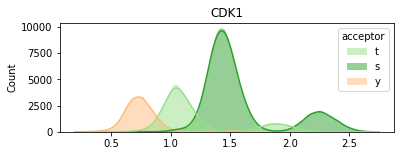

In [ ]:
plot_hist(cddm,'CDK1',hue=psp['acceptor'] )

## Get the gene names in the positive peaks

In [ ]:
def get_genes(site_df,score_df,kinase,s=None,t=None,y=None,export=False):
    
    df = site_df[['gene','acceptor']].copy()
    df['acceptor'] = df['acceptor'].str.upper() # convert to uppercase for query
    df['gene'] = df.gene.str.split('|')
    
    df[kinase] = score_df[kinase]
    
    print(df.shape)
    df = df.explode('gene') # if there are duplicated sites, genes will be separated by "|"; after explode, it should increase
    print(df.shape)
    
    L = []
    if s is not None:
        s = df.query(f'acceptor == "S" & {kinase}>{s}')['gene'].drop_duplicates()
        L.append(s)
    if t is not None:
        t = df.query(f'acceptor == "T" & {kinase}>{t}')['gene'].drop_duplicates()
        L.append(t)
    if y is not None:
        y = df.query(f'acceptor == "Y" & {kinase}>{y}')['gene'].drop_duplicates()
        L.append(y)
        
    sty = pd.concat(L).drop_duplicates().reset_index()
    
    if export:
        print('exporting csv file for st')
        sty.to_csv(f'{kinase}.csv')
        
    return sty

Set the threshold for the peak

In [ ]:
# based on the plot, set 1.9 for S sites and 1.5 for T sites
genes = get_genes(psp,cddm,'CDK1',s=1.9,t=1.5)

(239979, 3)
(239979, 3)


In [ ]:
genes

,index,gene
0,19,YWHAB
1,112,SFN
2,163,YWHAZ
3,189,EIF4EBP1
4,211,EIF4EBP2
...,...,...
9226,238003,ZNF770
9227,239092,ZNFX1
9228,239111,ZNHIT2
9229,239661,ZSCAN16


You can use the gene list for downstream analysis such as pathway analysis.